# Tarea 10

## Conexión

Se instalan e importan las librerías necesarias y se establece la conexión.

In [ ]:
pip install mysql-connector-python

In [ ]:
pip install pandas
pip install matplotlib
pip install matplotlib.pyplot

In [6]:
import mysql.connector
import pandas as pd
from pandas import DataFrame
import matplotlib

In [7]:
conn = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    database = 'BDR_financial',
    password = 'treboles'
)

## Guardar en dataframes de pandas

Se guardan las tablas de la base de datos en dataframes de pandas

In [ ]:
card_df = pd.read_sql_query("SELECT * FROM card", conn)
disp_df = pd.read_sql_query("SELECT * FROM disp", conn)
client_df = pd.read_sql_query("SELECT * FROM client", conn)
district_df = pd.read_sql_query("SELECT * FROM district", conn)
loan_df = pd.read_sql_query("SELECT * FROM loan", conn)
account_df = pd.read_sql_query("SELECT * FROM account", conn)
orders_df = pd.read_sql_query("SELECT * FROM orders1", conn)
trans_df = pd.read_sql_query("SELECT * FROM trans", conn)

## Consultas relevantes y operaciones de agregación.

In [9]:
cursor = conn.cursor()

In [25]:
query1 = """
SELECT d.Client_ID, sum(l.amount) as total_loan
FROM loan l
JOIN disp d ON l.Account_ID = d.Account_ID
GROUP BY d.Client_ID
ORDER BY total_loan DESC
LIMIT 5
"""

cursor.execute(query1)
result1 = cursor.fetchall()

result1


[(17, Decimal('422513014')),
 (13, Decimal('210696236')),
 (68, Decimal('55679575')),
 (28, Decimal('45949138')),
 (46, Decimal('45949138'))]

La consulta anterior muestra los cinco clientes con préstamos más altos.

In [11]:
query2 = """
SELECT c.Client_ID, count(l.Loan_ID) as número_préstamos
FROM Client c
JOIN Disp d ON c.Client_ID = d.Client_ID
JOIN Account a ON d.Account_ID = a.Account_ID
JOIN Loan l ON a.Account_ID = l.Account_ID
GROUP BY c.Client_ID
"""


cursor.execute(query2)
result_query2 = cursor.fetchall()

result_query2

[(28, 2),
 (13, 2),
 (68, 5),
 (23, 4),
 (65, 2),
 (85, 1),
 (44, 3),
 (66, 2),
 (55, 3),
 (12, 1),
 (71, 1),
 (91, 1),
 (82, 2),
 (92, 2),
 (49, 1),
 (20, 1),
 (61, 4),
 (78, 1),
 (46, 2),
 (36, 1),
 (29, 1),
 (79, 1),
 (16, 1),
 (57, 2),
 (35, 2),
 (53, 1),
 (64, 1),
 (62, 4),
 (99, 2),
 (41, 1),
 (72, 1),
 (7, 1),
 (27, 1),
 (50, 2),
 (17, 3),
 (93, 1),
 (97, 1),
 (80, 4),
 (9, 2),
 (5, 1),
 (52, 3),
 (90, 2)]

Este query ayuda a obtener el número total de préstamos de cada cliente. Se utiliza una operación de agregación (COUNT) junto con un GROUP BY para agrupar por cliente.

In [12]:
total_loans = """
SELECT COUNT(Loan_ID) AS total_loans
FROM Loan
"""

cursor.execute(total_loans)
t_loans = cursor.fetchone()[0]
print("Total préstamos otorgados:", t_loans)

Total préstamos otorgados: 100


In [13]:
prom_loan = """
SELECT AVG(amount) AS prom_loan
FROM Loan
"""

cursor.execute(prom_loan)
prom_loan = cursor.fetchone()[0]
print("Monto promedio de préstamos:", prom_loan)

Monto promedio de préstamos: 17144397.1600


## Visualizaciones de consultas.

Se importa la librería para los graficos.

In [18]:
import matplotlib.pyplot as plt

Visualización del query 1.

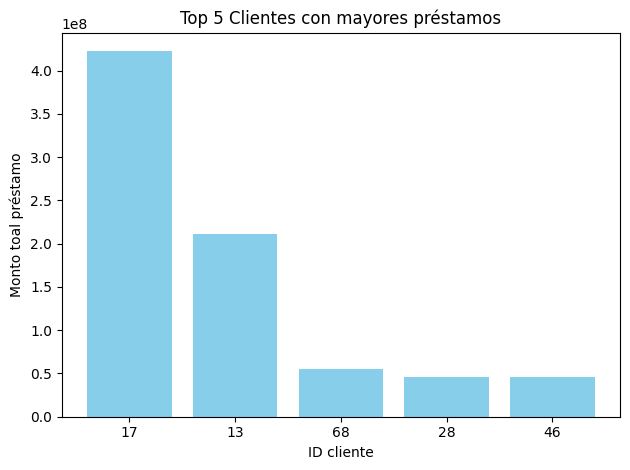

In [38]:

# se definen los datos de la consulta y se limita a la cantidad de clientes deseado (top 5)
client_ids = [row[0] for row in result1[:5]]
total_loans = [row[1] for row in result1[:5]]

# grafico
plt.bar(range(len(client_ids)), total_loans, color='skyblue')
plt.xticks(range(len(client_ids)), client_ids)
plt.xlabel('ID cliente')
plt.ylabel('Monto toal préstamo')
plt.title('Top 5 Clientes con mayores préstamos')

plt.tight_layout()
plt.show()


Visualización del query 2.

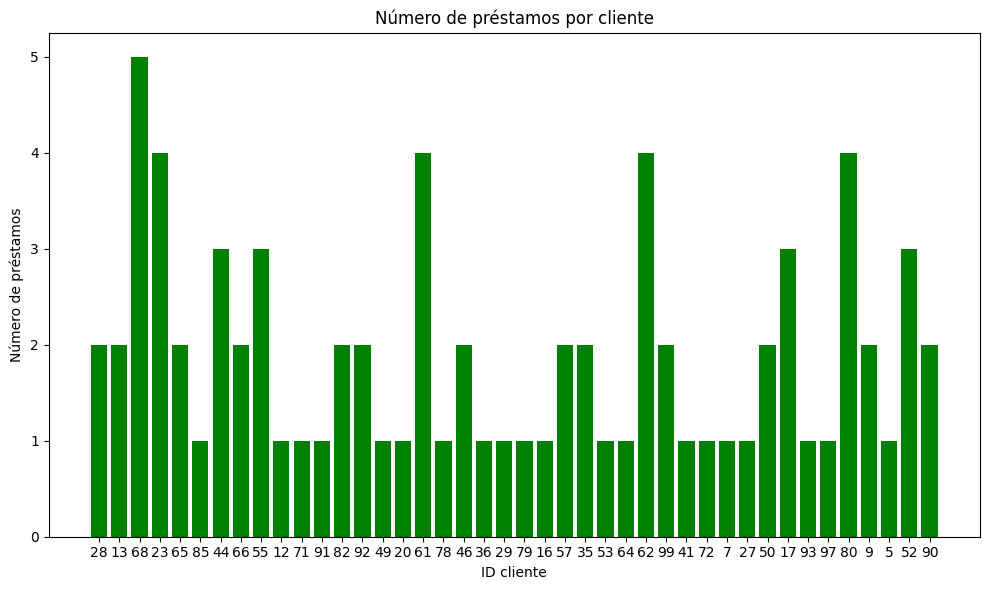

In [39]:
# se definen los datos de la consulta
client_ids = [row[0] for row in result_query2]
num_loans = [row[1] for row in result_query2]

# gráfico
plt.figure(figsize=(10, 6)) 
plt.bar(range(len(client_ids)), num_loans, color='green')
plt.xticks(range(len(client_ids)), client_ids)
plt.xlabel('ID cliente')
plt.ylabel('Número de préstamos')
plt.title('Número de préstamos por cliente')

plt.tight_layout()
plt.show()
